#  Perform the entire data analysis process to investigate a dataset on wine quality using python. 

In [68]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# import the datasets
red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

###  investigate this dataset on physicochemical properties and quality ratings of red and white wine samples. 

In [70]:
# find the first five rows of the red wine data
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [71]:
# find the first five rows of the white wine data
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## 1. Assessing and Building Intuition

Answer the following questions from the data

1. number of samples in each dataset
2. number of columns in each dataset
3. features with missing values
4. duplicate rows in the white wine dataset
5. number of unique values for quality in each dataset
6. mean density of the red wine dataset

### 1.1 Overview of number of samples

In [72]:
# How many samples of Red Wine are there? (1599)
print(red_df.shape)
red_df.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [73]:
# How many samples of white wine are there? (4898#)
print(white_df.shape)
white_df.info()

(4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [74]:
# How many columns are in each dataset? (12)
print(red_df.shape)
white_df.shape

(1599, 12)


(4898, 12)

### 1.2 Missing Values

In [75]:
# Find features with missing values
print(red_df.isnull().any().all())
red_df.isnull().sum()

False


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [76]:
# Find features with missing values
print(white_df.isnull().any().all())
white_df.isnull().sum()

False


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 1.3 Duplicates

In [77]:
# How many duplicate rows are in the red wine dataset?
red_df.duplicated().sum()

240

In [78]:
# How many duplicate rows are in the white wine dataset?
white_df.duplicated().sum()

937

### 1.4 Unique values in columns

In [79]:
# How many unique values of quality are in the red wine dataset?
red_df.quality.nunique()

6

In [80]:
# How many unique values of quality are in the white wine dataset?
white_df.quality.nunique()

7

### 1.5 Statistical figures

In [81]:
# What is the mean density in the red wine dataset?
print(red_df.density.mean())
red_df.describe()

0.996746679174484


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2. Appending Data frames.

To analyze the data more quickly, let's combine the red and white wine data sets into one dataframe. To do this we will add a new feature or column to each data set to indicate whether the wine is red or white. Create an array using Numpy and add that as a column to each dataframe.

Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.”

### 2.1 Renaming columns
For a smooth successful append, column names in the first and second dataframe should allign

In [82]:
# Check column names  for red and white wine
print(red_df.columns)
white_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [83]:
# Check for consistency. Incase of a mismatch, use

# df1 = df1.rename(columns={'old_name':'new_name'})

red_df.columns == white_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [84]:
# create color array for red dataframe
color_red = np.repeat('red', red_df.shape[0] )

# create color array for white dataframe
color_white = np.repeat('white', white_df.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array.

In [85]:
red_df['color'] = color_red
white_df['color'] = color_white

In [86]:
# confirm the changes
red_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red


In [87]:
# confirm the changes
white_df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white


### 2.2 Append the dataframes

In [88]:
# Combine the two data frames
wine_df = red_df.append(white_df)

In [89]:
# confirm success
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [90]:
# How many rows and columns are in the combined dataframe?
wine_df.shape

(6497, 13)

## 3. Exploring with Visuals

Perform exploratory data analysis on your newly combined dataframe. Create some visuals to answer these quiz questions below the notebook.

1. Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol

2. Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

### Histograms for various features


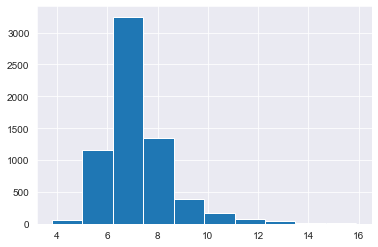

In [91]:
# Fixed acidity distribution
wine_df['fixed acidity'].hist();

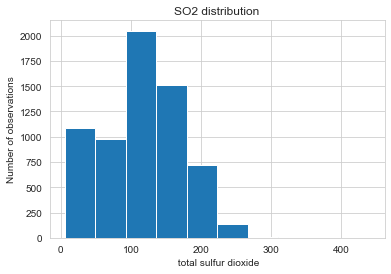

In [92]:
# distribution of sulphur dioxide
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.hist(wine_df['total sulfur dioxide'], bins = 10)
ax.set_xlabel(' total sulfur dioxide')
ax.set_ylabel('Number of observations')
ax.set_title('SO2 distribution')
plt.show()

Text(0.5, 1.0, 'pH distribution')

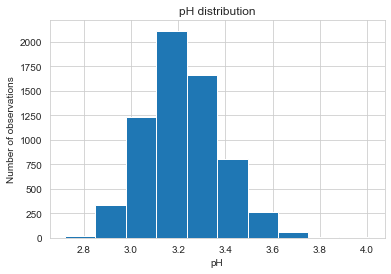

In [93]:
# ph distribution
sns.set_style('whitegrid')
fig, ax = plt.subplots()
ax.hist(wine_df['pH'], bins = 10)
ax.set_xlabel('pH')
ax.set_ylabel('Number of observations')
ax.set_title('pH distribution')

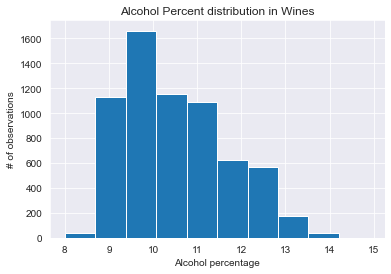

In [94]:
# alcohol percent distribution.
sns.set_style('darkgrid')

fig, ax = plt.subplots()
ax.hist(wine_df.alcohol)
ax.set_xlabel('Alcohol percentage')
ax.set_ylabel('# of observations')
ax.set_title('Alcohol Percent distribution in Wines')
plt.show()

### Scatter plots for various features compared to quality
Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

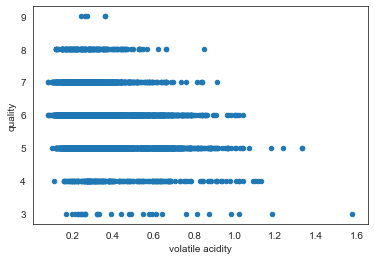

In [95]:
# Quality vs Volatile acidity scatter plot
sns.set_style('white')
wine_df.plot(x='volatile acidity', y= 'quality', kind='scatter')

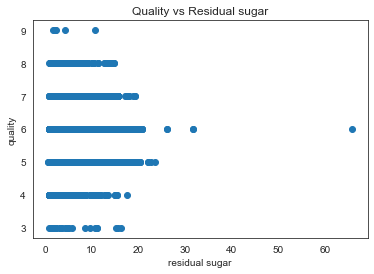

In [96]:
# Quality vs Residual sugar scatter plot
fig, ax = plt.subplots()
ax.scatter(x= wine_df['residual sugar'], y=wine_df['quality'])
ax.set_xlabel('residual sugar')
ax.set_ylabel('quality')
ax.set_title('Quality vs Residual sugar')
plt.show()

<AxesSubplot:xlabel='pH', ylabel='quality'>

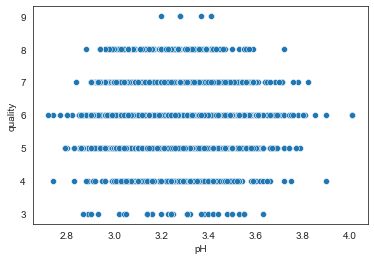

In [97]:
# quality vs pH scatter plot
sns.scatterplot(x='pH', y='quality', data=wine_df)

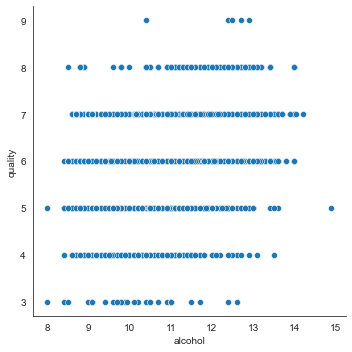

In [98]:
# quality vs alcohol scatter plot
sns.relplot(x='alcohol', y='quality', data=wine_df, kind='scatter')

## 4. Analytics: Panda's groupby( )

groupby( ) lets you group your data by a specific column(s) and creates aggregate information about those groupings. It also allows for group-specific transformations. Use groupby to get summary statistics about different groups in our data.

In [99]:
# find summary statistics for the whole dataset.
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [100]:
# find the means of the wines datafame
wine_df.mean()

fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

In [101]:
# find the mean pH
wine_df['pH'].mean()

3.2185008465445586

In [102]:
# Find the mean of pH of all samples with a quality rating of 7
# use groupby( ) combined with the mean function

wine_df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


In [103]:
# find mean of features grouped by quality and then color
# Here we see separate means for the pH level of all the red and white samples with a pH of 7 
wine_df.groupby(['quality', 'color']).mean()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

In [104]:
# find mean of features grouped by quality and then color
# Here we see separate means for the pH level of all the red and white samples with a pH of 7 
# if you don't want quality and color to be indexes, set as_index=False

wine_df.groupby(['quality', 'color'], as_index=False).mean()


,quality,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,white,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,white,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,white,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


In [105]:
# What if you are only interested in one column like pH? Index it.
wine_df.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898


### 4.1: Is a certain type of wine (red or white) associated with higher quality?

compare the average quality of red wine with the average quality of white wine with groupby. To do this group by color and then find the mean quality of each group.

In [106]:
wine_df.groupby('color')['quality'].mean()


color
red      5.636023
white    5.877909
Name: quality, dtype: float64

### 4.2  What level of acidity (pH value) receives the highest average rating

Create a categorical variable from a quantitative variable by creating your own categories. pandas' cut function let's you "cut" data in groups. Using this, create a new column called acidity_levels with these categories:

Acidity Levels:
1. High: Lowest 25% of pH values
2. Moderately High: 25% - 50% of pH values
3. Medium: 50% - 75% of pH values
4. Low: 75% - max pH value

In [107]:
wine_df.describe().pH

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [108]:
# Bin edges that will be used to "cut" the data into groups (min, 25%, 50%, 75%, max)
bin_edges = [2.72, 3.11, 3.21, 3.32, 4.01] # Fill in this list with five values you just found.

In [109]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] # Name each acidity level category

In [110]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [111]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_levels').mean().quality

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

What level of acidity receives the highest mean quality rating?

low

## 5. Pandas Query



### 5.1 Do wines with higher alcoholic content receive better ratings?
To answer this question, use query to create two groups of wine samples:

1. Low alcohol (samples with an alcohol content less than the median)

2. High alcohol (samples with an alcohol content greater than or equal to the median)

Then, find the mean quality rating of each group.

In [112]:
# what is the median of alcohol percent column?
wine_df.alcohol.median()

10.3

In [113]:
# dataframe of samples with an alcohol percentage less than the median
low = wine_df.query('alcohol < 10.3')  

In [114]:
# dataframe of samples with an alcohol percentage greater than or equal to the median
high = wine_df.query('alcohol >= 10.3')  

In [115]:
# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low['quality'].count() + high['quality'].count() # should be True

True

In [116]:
# find the mean quality rating
low.quality.mean()

5.475920679886686

In [117]:
# find the mean quality rating 
high.quality.mean()

6.146084337349397

ANS: wines with higher alcohol percentage receive better ratings. 

### 5.2 Do sweeter wines (more residual sugar) receive better ratings?
Similarly, use the median to split the samples into two groups by residual sugar and find the mean quality rating of each group.

In [118]:
# rename the column name
wine_df.rename(columns={'residual sugar':'residual_sugar'}, inplace=True)

In [119]:
# verify the col name
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual_sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'acidity_levels'],
      dtype='object')

In [120]:
# get the median amount of residual sugar
wine_df['residual_sugar'].median()

3.0

In [121]:
# select samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar < 3')

In [122]:
# select samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >= 3.0')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [123]:
# get mean quality rating for the low sugar
low_sugar.quality.mean()

5.808800743724822

In [124]:
# get mean quality rating for the high sugar groups
high_sugar.quality.mean()

5.82782874617737

ANS: Do sweeter wines generally receive higher ratings? Yes

## 6 Visualize analysis findings.

### 6.1 Is a certain type of wine, red or white associated with higher quality?

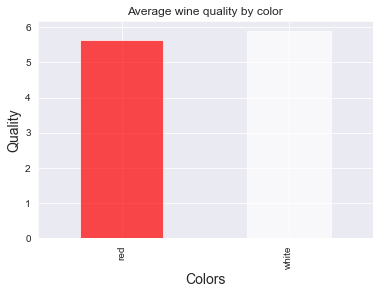

In [125]:
sns.set_style('darkgrid')
colors = ['red', 'white']
wine_df.groupby('color')['quality'].mean().plot(kind='bar', title='Average wine quality by color', color=colors, alpha=.7)
plt.xlabel('Colors', fontsize = 14)
plt.ylabel('Quality', fontsize = 14)
plt.show()

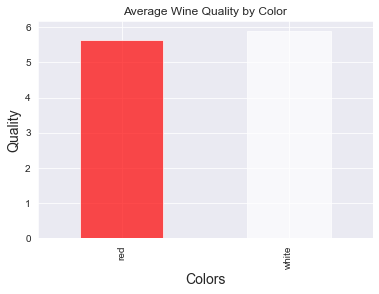

In [126]:
# Easier code to read
colors = ['red', 'white']
color_means =wine_df.groupby('color')['quality'].mean()
color_means.plot(kind='bar', title='Average Wine Quality by Color', color=colors, alpha=.7);
plt.xlabel('Colors', fontsize=14)
plt.ylabel('Quality', fontsize=14)
plt.show()

Text(0, 0.5, 'Count')

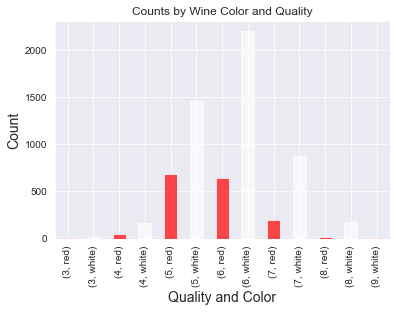

In [127]:
counts = wine_df.groupby(['quality', 'color']).count()['pH']
colors = ['red', 'white']
counts.plot(kind='bar', title='Counts by Wine Color and Quality', color=colors, alpha=.7);
plt.xlabel('Quality and Color', fontsize=14)
plt.ylabel('Count', fontsize=14)

Text(0, 0.5, 'Proportion')

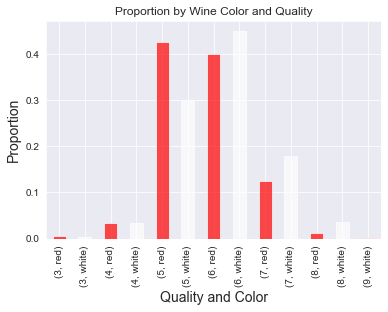

In [128]:
totals = wine_df.groupby('color').count()['pH']
proportions = counts / totals
proportions.plot(kind='bar', title='Proportion by Wine Color and Quality', color=colors, alpha=.7);
plt.xlabel('Quality and Color', fontsize=14)
plt.ylabel('Proportion', fontsize=14)

### 6.2 Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples. This first one is filled out for you.

In [129]:
# Use query to select each group and get its mean quality
median = wine_df['alcohol'].median()
low = wine_df.query('alcohol < {}'.format(median))
high = wine_df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

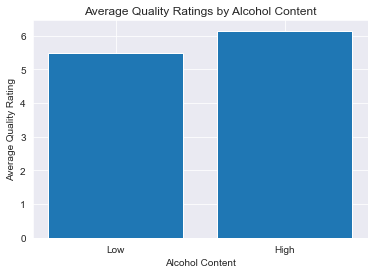

In [130]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### 6.3 Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [131]:
# Use query to select each group and get its mean quality
median = wine_df['residual_sugar'].median()
low = wine_df.query('residual_sugar < {}'.format(median))
high = wine_df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

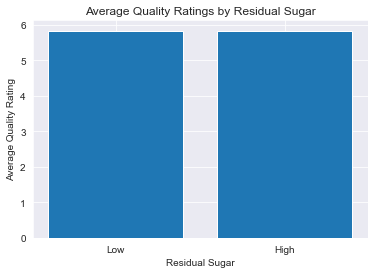

In [132]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### 6.4 What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [133]:
# Use groupby to get the mean quality for each acidity level
acidity_level_quality_means = wine_df.groupby('acidity_levels').quality.mean()
acidity_level_quality_means

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

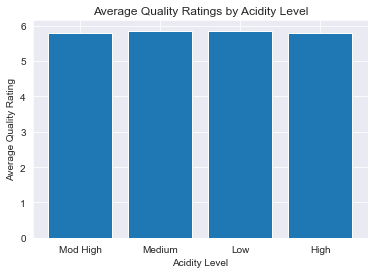

In [134]:
# Create a bar chart with proper labels
locations = [4, 1, 2, 3]  # reorder values above to go from low to high
heights = acidity_level_quality_means

# labels = ['Low', 'Medium', 'Moderately High', 'High']
labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');